In [24]:
print("Add Data")

Add Data


In [25]:
import pandas as pd

In [26]:
data = pd.read_csv("new_pune_data.csv");

In [27]:
data.head()

,date_time,uvIndex,DewPointC,HeatIndexC,cloudcover,humidity,precipMM,pressure,tempC,visibility,windspeedKmph
0,2008-12-11 00:00:00,6,13,18,31,72,0.0,1013,18,10,5
1,2008-12-11 01:00:00,6,14,19,30,72,0.0,1013,19,10,4
2,2008-12-11 02:00:00,6,13,18,29,72,0.0,1013,18,10,4
3,2008-12-11 03:00:00,6,13,18,29,72,0.0,1013,18,10,4
4,2008-12-11 04:00:00,6,13,20,23,68,0.0,1014,20,10,4


In [28]:
data.columns

Index(['date_time', 'uvIndex', 'DewPointC', 'HeatIndexC', 'cloudcover',
       'humidity', 'precipMM', 'pressure', 'tempC', 'visibility',
       'windspeedKmph'],
      dtype='object')

# Disease 1 : Heat Stroke

# Add new Column for heatstroke


In [29]:
data['heatStroke'] = None

In [30]:
data.columns

Index(['date_time', 'uvIndex', 'DewPointC', 'HeatIndexC', 'cloudcover',
       'humidity', 'precipMM', 'pressure', 'tempC', 'visibility',
       'windspeedKmph', 'heatStroke'],
      dtype='object')

In [31]:
data.head()


,date_time,uvIndex,DewPointC,HeatIndexC,cloudcover,humidity,precipMM,pressure,tempC,visibility,windspeedKmph,heatStroke
0,2008-12-11 00:00:00,6,13,18,31,72,0.0,1013,18,10,5,None
1,2008-12-11 01:00:00,6,14,19,30,72,0.0,1013,19,10,4,None
2,2008-12-11 02:00:00,6,13,18,29,72,0.0,1013,18,10,4,None
3,2008-12-11 03:00:00,6,13,18,29,72,0.0,1013,18,10,4,None
4,2008-12-11 04:00:00,6,13,20,23,68,0.0,1014,20,10,4,None


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116136 entries, 0 to 116135
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date_time      116136 non-null  object 
 1   uvIndex        116136 non-null  int64  
 2   DewPointC      116136 non-null  int64  
 3   HeatIndexC     116136 non-null  int64  
 4   cloudcover     116136 non-null  int64  
 5   humidity       116136 non-null  int64  
 6   precipMM       116136 non-null  float64
 7   pressure       116136 non-null  int64  
 8   tempC          116136 non-null  int64  
 9   visibility     116136 non-null  int64  
 10  windspeedKmph  116136 non-null  int64  
 11  heatStroke     0 non-null       object 
dtypes: float64(1), int64(9), object(2)
memory usage: 10.6+ MB


In [33]:
data['heatStroke'].describe()

count       0
unique      0
top       NaN
freq      NaN
Name: heatStroke, dtype: object

In [34]:
data['heatStroke'].value_counts

<bound method IndexOpsMixin.value_counts of 0         None
1         None
2         None
3         None
4         None
          ... 
116131    None
116132    None
116133    None
116134    None
116135    None
Name: heatStroke, Length: 116136, dtype: object>

In [35]:
data.columns

Index(['date_time', 'uvIndex', 'DewPointC', 'HeatIndexC', 'cloudcover',
       'humidity', 'precipMM', 'pressure', 'tempC', 'visibility',
       'windspeedKmph', 'heatStroke'],
      dtype='object')

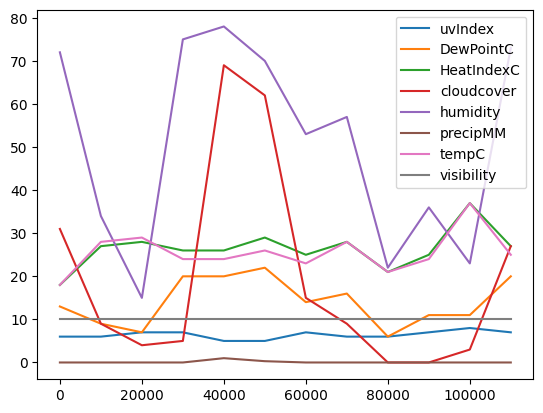

In [36]:
import matplotlib.pyplot as plt

# Define the downsampling factor
downsample_factor = 10000

# Plot every nth data point for each variable
plt.plot(data['uvIndex'][::downsample_factor], label='uvIndex')
plt.plot(data['DewPointC'][::downsample_factor], label='DewPointC')
plt.plot(data['HeatIndexC'][::downsample_factor], label='HeatIndexC')
plt.plot(data['cloudcover'][::downsample_factor], label='cloudcover')
plt.plot(data['humidity'][::downsample_factor], label='humidity')
plt.plot(data['precipMM'][::downsample_factor], label='precipMM')
plt.plot(data['tempC'][::downsample_factor], label='tempC')
plt.plot(data['visibility'][::downsample_factor], label='visibility')
# plt.plot(data['pressure'][::downsample_factor], label='pressure')

# Add legend
plt.legend()

# Show plot
plt.show()


# Add values in HeatStroke



In [37]:
data.head()

,date_time,uvIndex,DewPointC,HeatIndexC,cloudcover,humidity,precipMM,pressure,tempC,visibility,windspeedKmph,heatStroke
0,2008-12-11 00:00:00,6,13,18,31,72,0.0,1013,18,10,5,None
1,2008-12-11 01:00:00,6,14,19,30,72,0.0,1013,19,10,4,None
2,2008-12-11 02:00:00,6,13,18,29,72,0.0,1013,18,10,4,None
3,2008-12-11 03:00:00,6,13,18,29,72,0.0,1013,18,10,4,None
4,2008-12-11 04:00:00,6,13,20,23,68,0.0,1014,20,10,4,None


In [38]:

uv_condition = data['uvIndex'] >= 7
dewpoint_condition = data['DewPointC'] >= 18
heatindex_condition = data['HeatIndexC'] >= 32
cloudcover_condition = data['cloudcover'] < 50  
# pressure_condition = (data['pressure'] >= 1000) & (data['pressure'] <= 1015)  
visibility_condition = data['visibility'] >= 5 
windspeed_condition = data['windspeedKmph'] < 20  

humidity_condition = data['humidity'] >= 60
precip_condition = data['precipMM'] <=1
temp_condition = data['tempC'] >= 30

# Combine all conditions using logical AND
overall_condition = (
    humidity_condition & precip_condition & temp_condition & uv_condition & windspeed_condition & heatindex_condition
)

# Update 
data['heatStroke'] = 0 # before
data.loc[overall_condition, 'heatStroke'] = 1  # according to condition


In [39]:
data.describe()

,uvIndex,DewPointC,HeatIndexC,cloudcover,humidity,precipMM,pressure,tempC,visibility,windspeedKmph,heatStroke
count,116136.000000,116136.000000,116136.000000,116136.00000,116136.000000,116136.000000,116136.000000,116136.000000,116136.000000,116136.000000,116136.000000
mean,6.208927,15.141722,26.364383,31.43028,57.646001,0.231727,1009.731522,25.304720,9.409899,9.397663,0.001627
std,0.921580,6.093959,4.355228,34.09457,25.316012,0.802657,3.580792,4.659629,1.593393,4.775019,0.040308
min,4.000000,-12.000000,11.000000,0.00000,4.000000,0.000000,997.000000,11.000000,0.000000,0.000000,0.000000
25%,5.000000,10.000000,25.000000,3.00000,36.000000,0.000000,1007.000000,22.000000,10.000000,6.000000,0.000000
50%,6.000000,16.000000,26.000000,12.00000,58.000000,0.000000,1010.000000,24.000000,10.000000,9.000000,0.000000
75%,7.000000,21.000000,29.000000,66.00000,82.000000,0.100000,1012.000000,28.000000,10.000000,12.000000,0.000000
max,8.000000,25.000000,44.000000,100.00000,100.000000,25.700000,1021.000000,43.000000,10.000000,40.000000,1.000000


In [40]:
data['heatStroke'].value_counts()
# data['precipMM']



heatStroke
0    115947
1       189
Name: count, dtype: int64

In [41]:
# uvIndex:   UV >= 7

# DewPointC:  Temperature >= 18(°C)  

# HeatIndexC:  Temperature >= 32 (°C)

# cloudcover: Cloud Cover (%)

# humidity: Humidity >= 60(%)

# precipMM: Precipitation  0 (mm)

# pressure: Atmospheric Pressure (millibars)

# tempC:  temp > = 40(°C)

# visibility: Visibility (kilometers)

# windspeedKmph: Wind Speed (kilometers per hour)

In [42]:
# plt.plot(data['heatStroke'],data['uvIndex'])

In [43]:
data.head()

,date_time,uvIndex,DewPointC,HeatIndexC,cloudcover,humidity,precipMM,pressure,tempC,visibility,windspeedKmph,heatStroke
0,2008-12-11 00:00:00,6,13,18,31,72,0.0,1013,18,10,5,0
1,2008-12-11 01:00:00,6,14,19,30,72,0.0,1013,19,10,4,0
2,2008-12-11 02:00:00,6,13,18,29,72,0.0,1013,18,10,4,0
3,2008-12-11 03:00:00,6,13,18,29,72,0.0,1013,18,10,4,0
4,2008-12-11 04:00:00,6,13,20,23,68,0.0,1014,20,10,4,0


In [44]:
# X = date_time 	uvIndex 	DewPointC 	HeatIndexC 	cloudcover 	humidity 	precipMM 	pressure 	tempC 	visibility 	windspeedKmph

# y = heatStroke

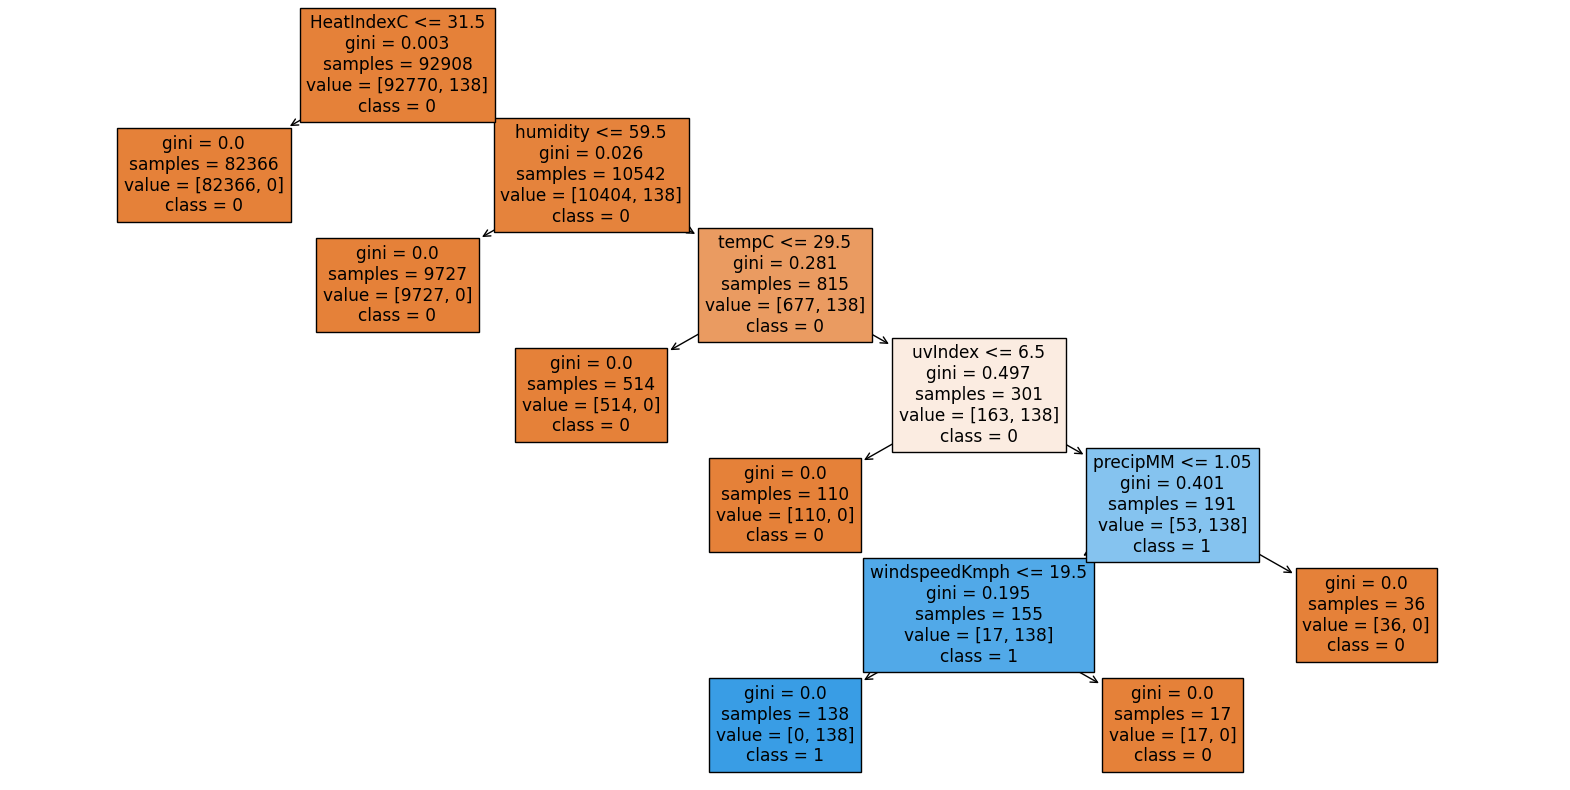

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


data.drop('date_time', axis=1, inplace=True)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('heatStroke', axis=1), data['heatStroke'], test_size=0.2, random_state=42)

# Initialize and train a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
plot_tree(clf, feature_names=data.columns[:-1].tolist(), class_names=['0', '1'], filled=True)
plt.show()



In [47]:
print(data.columns)



Index(['uvIndex', 'DewPointC', 'HeatIndexC', 'cloudcover', 'humidity',
       'precipMM', 'pressure', 'tempC', 'visibility', 'windspeedKmph',
       'heatStroke'],
      dtype='object')


In [49]:
arr = clf.predict(X_test)

In [50]:
arr


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [54]:
# for i in arr:
#     if i ==1:
#         print("Yes")
#     else:
#         print("No")
        